In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("Data/Real-Data/Real_Combine.csv")
df=df.dropna()

In [3]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [4]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=1)

In [5]:
from sklearn.neighbors import KNeighborsRegressor 

In [6]:
model=KNeighborsRegressor()

In [8]:
model.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [10]:
print("Coefficient of determination R^2 <-- on train set: {}".format(model.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.6828328306131742


In [11]:
print("Coefficient of determination R^2 <-- on train set: {}".format(model.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.5624396453270007


In [14]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x,y,cv=5)

In [15]:
score.mean()

0.4315907907186956

In [17]:
prediction=model.predict(X_test)

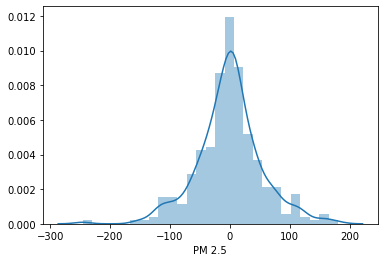

In [18]:
sns.distplot(y_test-prediction)

# WITH HELP OF HYPER PARAMETER

In [20]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

In [22]:
#accuracy_rate

Text(0, 0.5, 'Accuracy Rate')

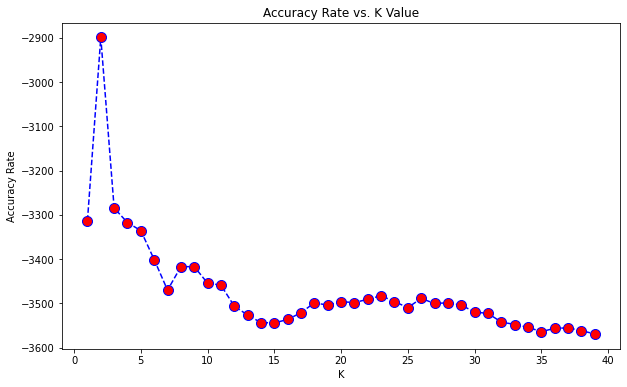

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [24]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsRegressor(n_neighbors=1)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

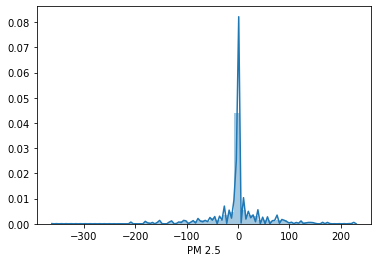

In [25]:
sns.distplot(y_test-predictions)

In [26]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 27.637258638211378
MSE: 2895.0614358379917
RMSE: 53.80577511604114


In [27]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

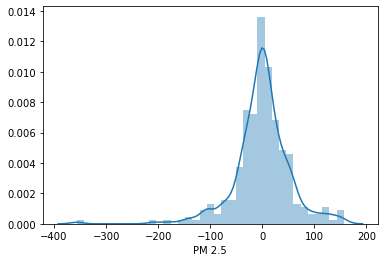

In [28]:
sns.distplot(y_test-predictions)

In [29]:


print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))



MAE: 39.31140243902439
MSE: 2979.0305927210366
RMSE: 54.58049644993197
